extract sun position data for 2 places 

### Sun Position Data:

- **apparent_elevation**:
  - **Meaning**: The apparent height of the sun above the horizon.
  - **Unit**: Degrees (°)
  - **Explanation**: 
    - 0° means the sun is on the horizon.
    - 90° means the sun is directly overhead.
    - Negative values indicate the sun is below the horizon.

- **azimuth**:
  - **Meaning**: The azimuth angle of the sun.
  - **Unit**: Degrees (°)
  - **Explanation**: 
    - Measured from north (0°), clockwise.
    - 90° is east, 180° is south, 270° is west, and 0°/360° is north.

- **elevation**:
  - **Meaning**: Geodetic height of the sun above the local reference level.
  - **Unit**: Degrees (°)
  - **Explanation**: 
    - Similar to apparent elevation, but it can also show the sun's height above sea level.

- **zenith**:
  - **Meaning**: The zenith angle of the sun.
  - **Unit**: Degrees (°)
  - **Explanation**: 
    - 0° means the sun is directly overhead (zenith).
    - 90° means the sun is on the horizon.

- **latitude**:
  - **Meaning**: Geographical latitude of the observation point.
  - **Unit**: Degrees (°)
  - **Explanation**: 
    - Ranges from -90° (South Pole) to +90° (North Pole).

- **longitude**:
  - **Meaning**: Geographical longitude of the observation point.
  - **Unit**: Degrees (°)
  - **Explanation**: 
    - Ranges from -180° (west) to +180° (east).

- **timestamp**:
  - **Meaning**: The time when the sun's position was measured.
  - **Unit**: Timestamp (Date and time)
  - **Explanation**: 
    - Indicates when the sun's position is recorded throughout the day.


In [16]:
!pip install pvlib pytz

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 6.8 MB/s eta 0:00:00a 0:00:01


In [49]:
import os
import pandas as pd
from datetime import datetime, timedelta
from pvlib import solarposition
import pytz

locations = [
    {"latitude": 14.81334707079426, "longitude": 78.28666058707, "name": "Gandikota"},
    {"latitude": 19.996751368420384, "longitude": 73.79008784475225, "name": "Nashik"}  
]

india_timezone = pytz.timezone('Asia/Kolkata')

start_date = india_timezone.localize(datetime(2020, 5, 15, 0, 0, 0))  # 00:00 IST
end_date = india_timezone.localize(datetime(2020, 6, 17, 23, 45, 0))   # 23:45 IST
time_interval = timedelta(minutes=15)

def get_sun_position(latitude, longitude, start_date, end_date, interval):
    time_range_ist = pd.date_range(start=start_date, end=end_date, freq=interval, tz=india_timezone)
    solar_pos = solarposition.get_solarposition(time_range_ist, latitude, longitude)
    
    return solar_pos
output_folder = '/workspaces/ppp-project/data/sun_position/'
os.makedirs(output_folder, exist_ok=True)

for location in locations:
    latitude = location["latitude"]
    longitude = location["longitude"]
    location_name = location["name"]

    solar_pos = get_sun_position(latitude, longitude, start_date, end_date, time_interval)

    df = solar_pos[['apparent_elevation', 'azimuth', 'elevation', 'zenith']].copy()

    df['latitude'] = latitude
    df['longitude'] = longitude
    df['timestamp'] = df.index

    df['timestamp'] = df['timestamp'].dt.tz_localize(None)
    
    df.to_csv(os.path.join(output_folder, f'{location_name}_sun_position_data.csv'), index=False)

    print(f"Sonnenpositionsdaten für {location_name} wurden erfolgreich gespeichert.")


Sonnenpositionsdaten für Gandikota wurden erfolgreich gespeichert.
Sonnenpositionsdaten für Nashik wurden erfolgreich gespeichert.


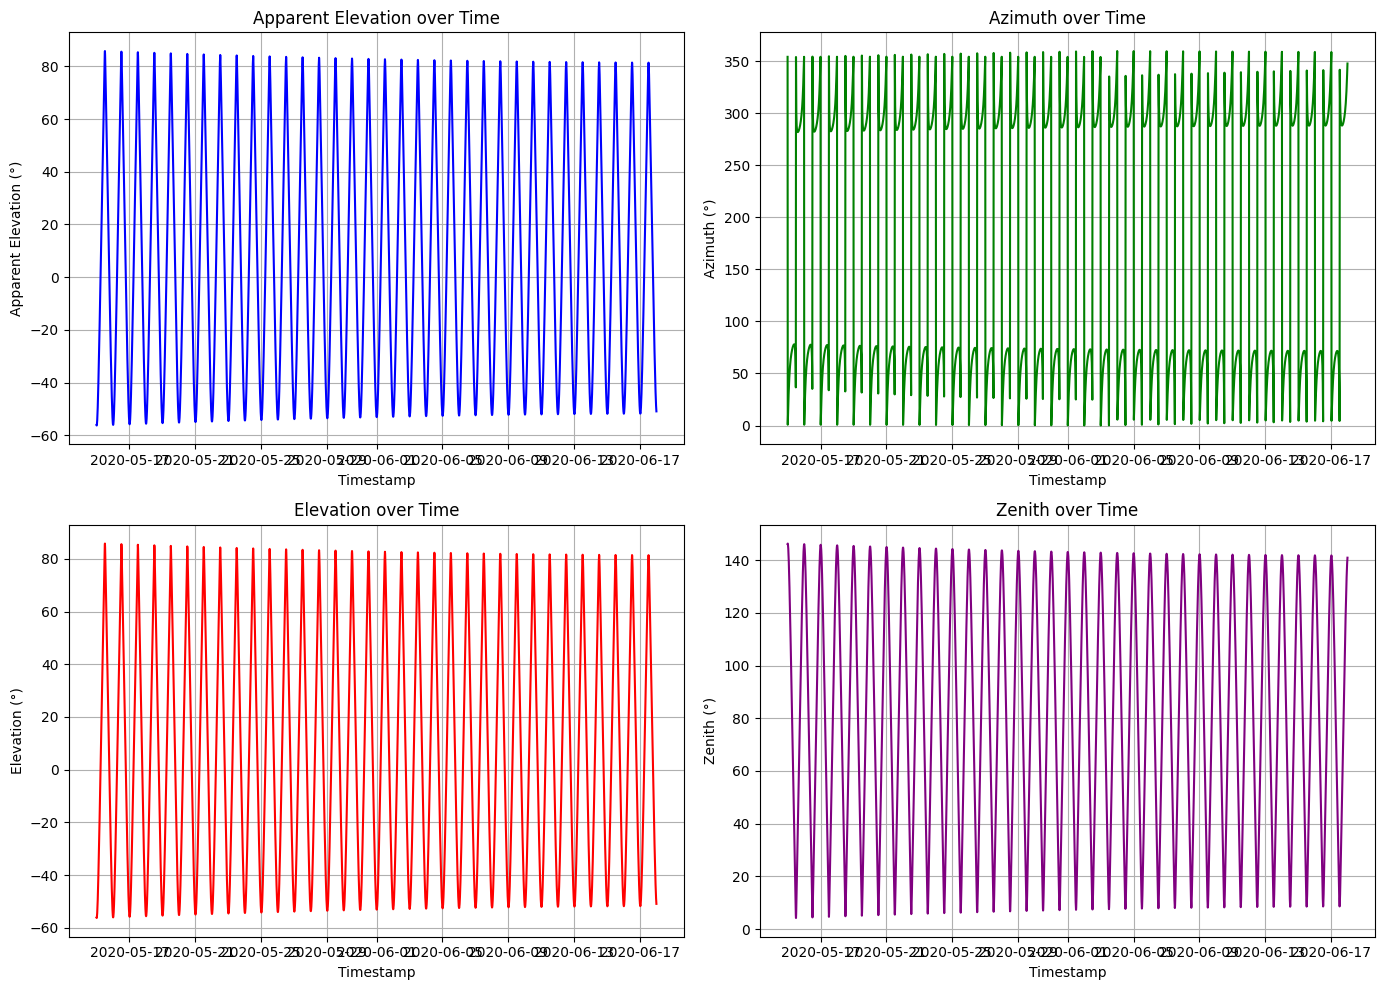

Graphische Darstellung der Sonnenpositionsdaten für Gandikota wurde erfolgreich erstellt.


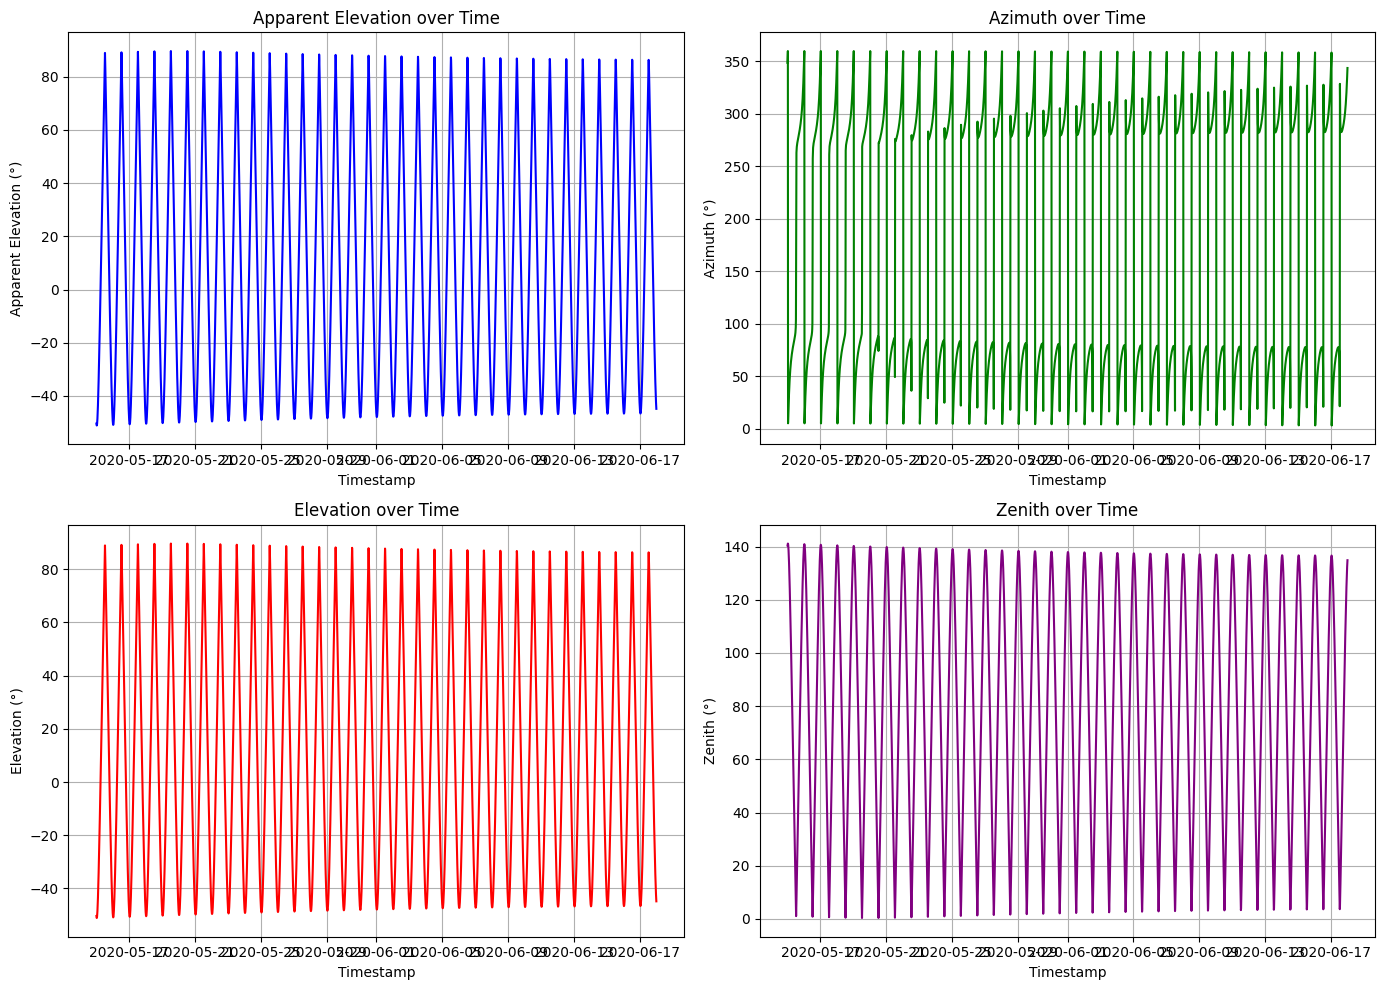

Graphische Darstellung der Sonnenpositionsdaten für Nashik wurde erfolgreich erstellt.


In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt

output_folder = '/workspaces/ppp-project/data/sun_position/'
locations = [
    "Gandikota",
    "Nashik"
]
for location_name in locations:
    file_path = os.path.join(output_folder, f'{location_name}_sun_position_data.csv')
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes[0, 0].plot(df['timestamp'], df['apparent_elevation'], color='blue', label='Apparent Elevation')
    axes[0, 0].set_title('Apparent Elevation over Time')
    axes[0, 0].set_xlabel('Timestamp')
    axes[0, 0].set_ylabel('Apparent Elevation (°)')
    axes[0, 0].grid(True)
    
    axes[0, 1].plot(df['timestamp'], df['azimuth'], color='green', label='Azimuth')
    axes[0, 1].set_title('Azimuth over Time')
    axes[0, 1].set_xlabel('Timestamp')
    axes[0, 1].set_ylabel('Azimuth (°)')
    axes[0, 1].grid(True)

    axes[1, 0].plot(df['timestamp'], df['elevation'], color='red', label='Elevation')
    axes[1, 0].set_title('Elevation over Time')
    axes[1, 0].set_xlabel('Timestamp')
    axes[1, 0].set_ylabel('Elevation (°)')
    axes[1, 0].grid(True)

    axes[1, 1].plot(df['timestamp'], df['zenith'], color='purple', label='Zenith')
    axes[1, 1].set_title('Zenith over Time')
    axes[1, 1].set_xlabel('Timestamp')
    axes[1, 1].set_ylabel('Zenith (°)')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

    print(f"Graphische Darstellung der Sonnenpositionsdaten für {location_name} wurde erfolgreich erstellt.")
